In [1]:
# import library

import numpy as np
import pandas as pd

In [2]:
# load the training and testing dataset

train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')


In [3]:
train_data.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [4]:
test_data.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


# Cleaning the training dataset

In [5]:
# shape of training dataset

train_data.shape

(6019, 14)

# 6019 rows 
# 14     columns

In [6]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

## Drop Unnamed:0 columns from dataset

In [7]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)

In [8]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

## Name of Vehicle


In [9]:
train_data['Name'].head(4)

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
Name: Name, dtype: object

### Datatype of 'Name' is object 

## Different Location

In [10]:
train_data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

## Model of Vehicle

In [11]:
train_data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

## Fuel Type of car

In [12]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

## Transmission of car

In [13]:
train_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

## Owner Type of car

In [14]:
train_data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

## Seats of car

In [15]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

## checking  and removing null values

In [16]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Removing null from Mileage columns

In [17]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)


### Removing null from Engine columns

In [18]:
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine: ",train_data.shape)

Shape of train data After dropping Rows with NULL values in Engine:  (5981, 13)


In [19]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Removing null from Power columns

In [20]:
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power: ",train_data.shape)

Shape of train data After dropping Rows with NULL values in Power:  (5981, 13)


### Removing null from Seats columns

In [21]:
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats: ",train_data.shape)

Shape of train data After dropping Rows with NULL values in Seats:  (5975, 13)


### After dropping null containing rows some index are unstructure,
### eg.  if drop 45 row then  after 44 there was 47 so reset index

In [22]:
train_data = train_data.reset_index(drop=True)


### We can't use object data type for prediction, convert into float data type

In [23]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]
    

In [24]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Company', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)'],
      dtype='object')

In [25]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [26]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Company', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)', 'New_car_Price'],
      dtype='object')

In [27]:
train_data.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.6,998,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.2,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76,NaN


In [28]:
train_data['Power'][76]

'null bhp'

In [29]:
## remove n 

In [30]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)

In [31]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Company', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)', 'New_car_Price'],
      dtype='object')

In [32]:
train_data.index[position]

Int64Index([  76,   79,   89,  120,  143,  225,  242,  259,  304,  305,
            ...
            5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941],
           dtype='int64', length=103)

In [33]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [34]:
train_data.shape

(5872, 18)

## Drop all duplicate columns

In [36]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [37]:
train_data.shape

(5872, 13)

In [38]:
train_data.head(4)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.6,998,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582,126.2,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.2,1199,88.7,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248,88.76,NaN


In [39]:
train_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_car_Price'],
      dtype='object')

## Target column is Price

In [40]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Maximum price is 160.00
### Minimum price is  0.4400


## Graph Fuel Type vs Price

In [41]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [42]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

In [43]:
import matplotlib.pyplot as plt

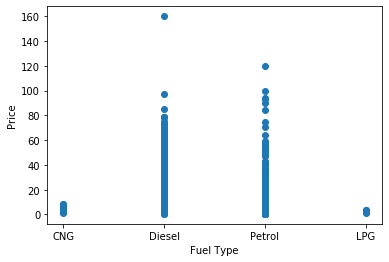

In [44]:
plt.scatter(train_data['Fuel_Type'], train_data['Price'] )
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

## Price of Diesel Engine vehicle is more compare to Petrol Engine


## Model of vehicle

In [46]:
train_data['Year'].describe()

count    5872.000000
mean     2013.477691
std         3.164568
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

## Oldest model is 1998 and newest model is 2019

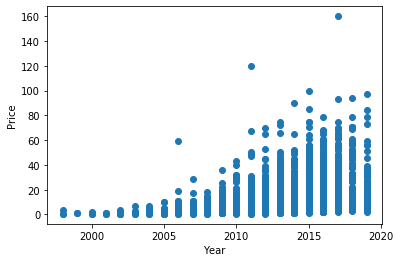

In [47]:
plt.scatter(train_data['Year'], train_data['Price'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

## Price of Newest model is higher than older model vehicle

## Company of vehicle

In [48]:
train_data['Company'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [49]:
train_data['Company'].describe()

count       5872
unique        30
top       Maruti
freq        1175
Name: Company, dtype: object

## Maruti is top model compare to all other car

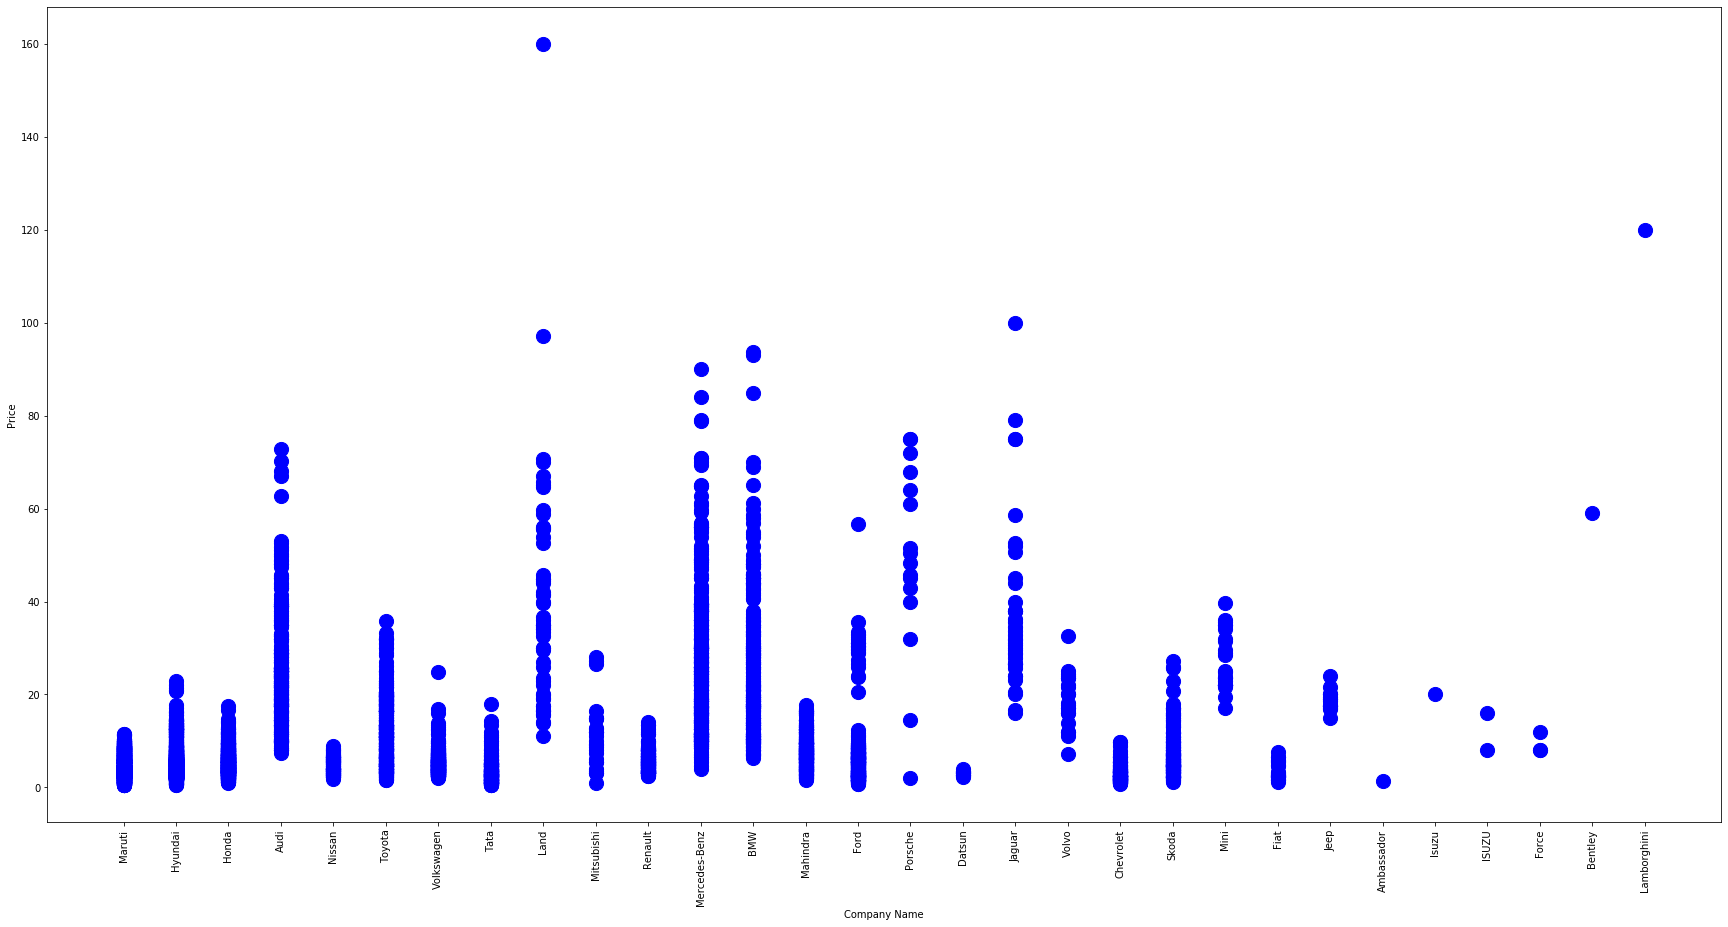

In [50]:
plt.figure(figsize = (30,15))
plt.scatter(train_data['Company'], train_data['Price'], s = 200, c = 'blue')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()



In [51]:
import seaborn as sns

<Figure size 1440x720 with 0 Axes>

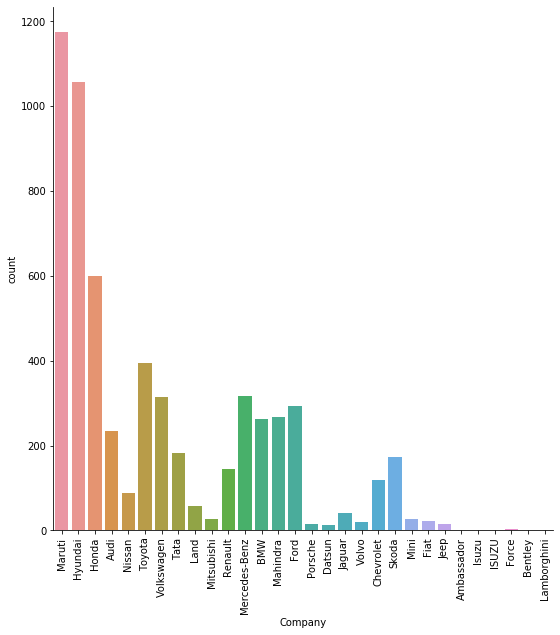

In [52]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count",height = 8, data=train_data);
plt.xticks(rotation=90);

## In India Maruti is most selling car 

## Location

In [53]:
train_data['Location'].describe()

count       5872
unique        11
top       Mumbai
freq         775
Name: Location, dtype: object

In [54]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<Figure size 1440x720 with 0 Axes>

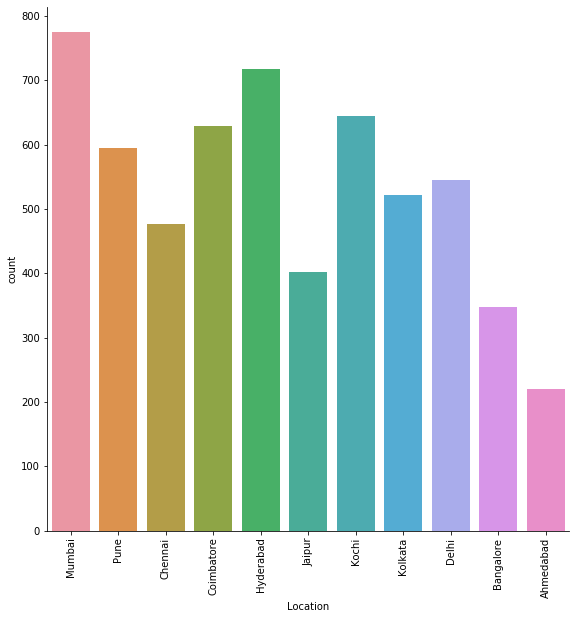

In [55]:
var = "Location"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count",height = 8, data=train_data);
plt.xticks(rotation=90);

## No. of car in Mumbai is maximum compare to other city

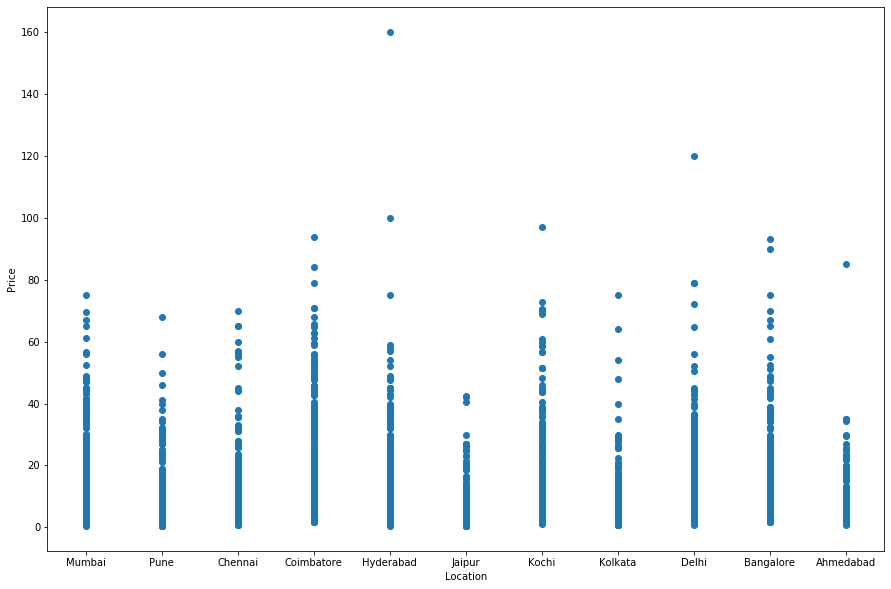

In [56]:
plt.figure(figsize = (15,10))
plt.scatter(train_data['Location'], train_data['Price'])

plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

## No. of car in Hyderabad is maximum

## We use encoding for categorical data

## onehotencoder  - for unordered data
## labelencoder      - for ordered data

### Location , transmission and fuel_type  data is unordered so we use onehotencoder

## Owner type  is ordered data so use labelencoder

In [71]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [72]:
var = 'Fuel_Type'

In [73]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [74]:
var = 'Transmission'

In [75]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [76]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.6,998,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582,126.2,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.2,1199,88.7,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.2,1968,140.8,NaN


In [77]:
train_data.shape

(5872, 12)

In [78]:
train_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)', 'New_car_Price'],
      dtype='object')

## Let's drop Duplicate columns

In [81]:
# train_data.drop(["Company"],axis=1,inplace=True)


In [82]:
train_data.shape

(5872, 12)

### Concatinate the encodind data to train data

In [84]:
final_train_data= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.6,998,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.2,1199,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.2,1968,...,0,0,0,0,0,0,1,0,0,0


In [85]:
final_train_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Mileage(km/kg)', 'Engine(CC)',
       'Power(bhp)', 'New_car_Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [86]:
final_train_data.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.6,998,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582,126.2,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.2,1199,88.7,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.2,1968,140.8,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
final_train_data.shape

(5872, 22)

In [88]:
final_train_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

## Preprocessing of train_dataset completed

## Prepare test data

In [89]:
test_data.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


## Remove the unnamed columns

In [90]:
test_data = test_data.iloc[:,1:]

In [91]:
test_data.shape

(1234, 12)

In [92]:
test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')

## Detect and remove null values

In [93]:
test_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [95]:
test_data = test_data[test_data['Mileage'].notna()]

In [96]:
test_data.shape

(1234, 12)

## Remove null values from Engine

In [97]:
test_data = test_data[test_data['Engine'].notna()]

In [98]:
test_data.shape

(1224, 12)

## Removing null values from Power

In [99]:
test_data = test_data[test_data['Power'].notna()]

In [100]:
test_data.shape

(1224, 12)

## Removing null values from Seats

In [101]:
test_data = test_data[test_data['Seats'].notna()]

In [102]:
test_data.shape

(1223, 12)

### After removing of null values some index are not in order, so reset index

In [103]:
test_data = test_data.reset_index(drop=True)

In [105]:
test_data.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


In [106]:
## same as train_dataset

In [107]:
for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]

In [108]:
position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)

In [109]:
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 


In [110]:
for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

In [111]:
test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'New_car_Price'],
      dtype='object')

In [112]:
test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

In [113]:
test_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'New_car_Price'],
      dtype='object')

In [114]:
var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0


In [115]:
var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [116]:
var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,1


In [117]:
test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Delhi,2014,40929,CNG,Manual,1,4.0,32.26,998,58.2,NaN
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,24.7,796,47.3,NaN
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,13.68,2393,147.8,25.27
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,18.5,1197,82.85,NaN
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,16.0,2179,140,NaN


In [118]:
final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,40929,CNG,Manual,1,4.0,32.26,998,58.2,...,0,0,0,0,0,0,0,0,0,1
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,24.7,796,47.3,...,0,0,0,0,0,0,0,0,1,1
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,13.68,2393,147.8,...,0,0,0,0,1,0,1,0,0,1
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,18.5,1197,82.85,...,0,0,0,0,1,0,0,0,1,1
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,16.0,2179,140,...,0,0,0,0,0,0,1,0,0,1


In [119]:
final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)

In [120]:
final_test.shape

(1201, 21)

In [122]:
final_test.head(4)

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998,58.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.7,796,47.3,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393,147.8,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.5,1197,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1


## Preprocessing of Test_data is completed

## Select the columns for X and y

In [124]:
X = final_train_data.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual']]

In [125]:
X.shape

(5872, 21)

In [126]:
y = final_train_data.loc[:,['Price']]

In [127]:
y.shape

(5872, 1)

In [129]:
X.head(4)   ## input data

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,26.6,998,58.16,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,19.67,1582,126.2,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,18.2,1199,88.7,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,20.77,1248,88.76,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [131]:
y.head(4)    ## Output

,Price
0,1.75
1,12.50
2,4.50
3,6.00


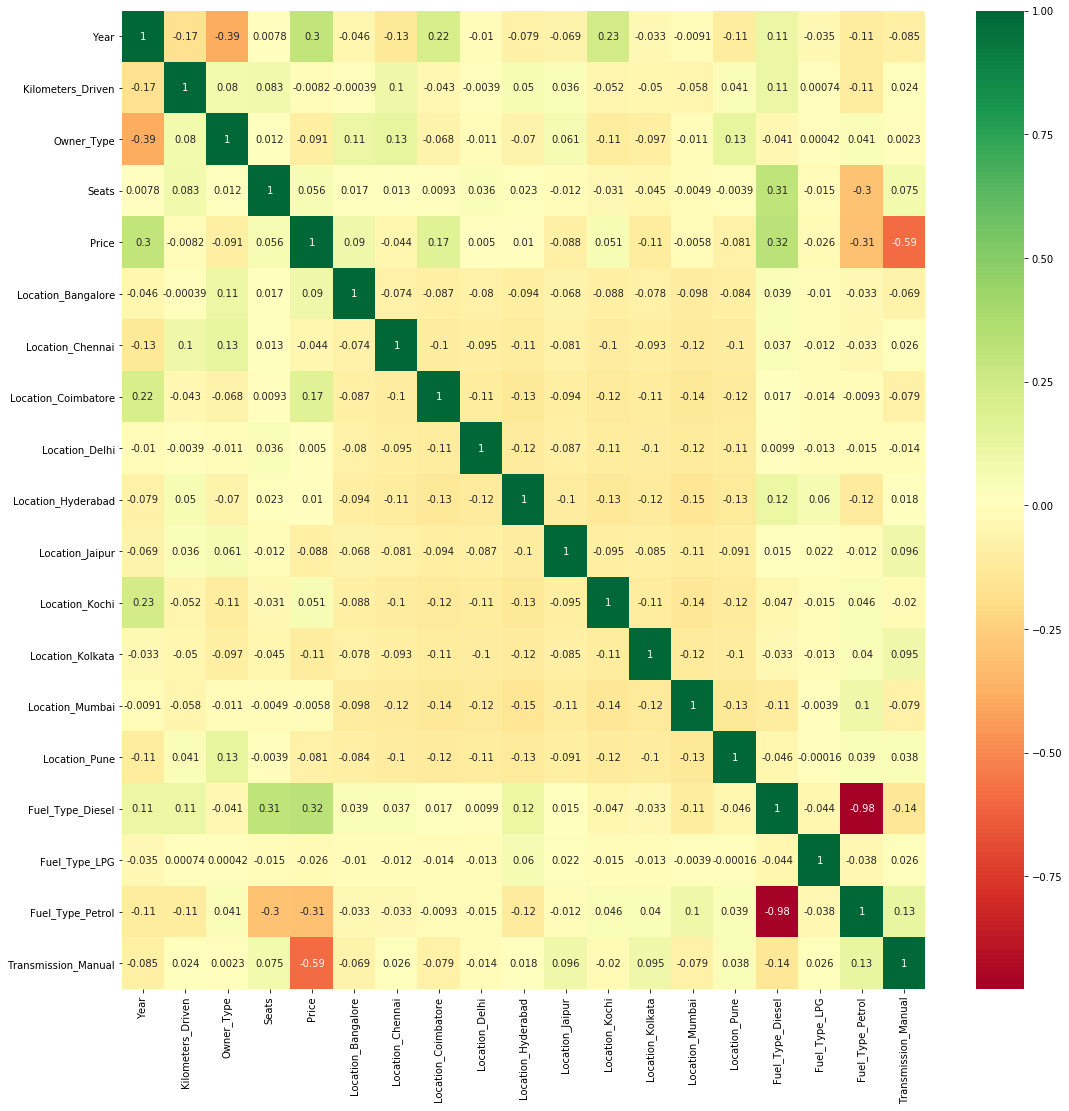

In [135]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Splitting the dataset

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [138]:
X_train.shape

(4697, 21)

In [139]:
X_test.shape

(1175, 21)

## Fit the model

In [140]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
y_pred= linear_reg.predict(X_test)

In [142]:
y_pred == y_test

,Price
262,False
1886,False
4925,False
5452,False
2189,False
...,...
633,False
5345,False
1514,False
2193,False


In [143]:
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))

Accuracy on Traing set:  0.7083070284244629


In [144]:
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Testing set:  0.6991016530826978


## Using linear regressor accuracy is not good

### Using Random Forest for good accuracy

In [145]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [146]:
rf_reg.fit(X_train, y_train)

C:\Users\bitto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [147]:
y_pred= rf_reg.predict(X_test)

In [149]:
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))


Accuracy on Traing set:  0.9828896617996209


In [150]:
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Testing set:  0.9086420508963549


## Accuracy is good

## INPUT DATA -:  year, kilometer, owner type(1,2,3), seats, Mileage, 
##                            Engine, Power, Location, Fuel_Type, Transmission 

In [163]:
rf_reg.predict([[2010,72000,1,5.0,22.6,998,58.16,0,0,0,0,0,0,0,0,0,1,0,0,0,1]])

array([1.7965])

In [162]:
final_train_data.head(4)  # 1.75

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.6,998,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582,126.2,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.2,1199,88.7,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
